# Student Data Exploratory Data Analysis

## Import Necessary Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read Data 

In [2]:
data = pd.read_csv('student_extended_ml_dataset2.csv')

### Check wether data is loaded or not

In [3]:
data.head()

,Name,Age,Gender,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job,Study_Hours_Group
0,Jason Vargas,19,Male,8.140821,92,87,43,85,True,High
1,Sandra Wiggins,35,Female,9.825626,112,86,81,54,False,High
2,Julia Olsen,33,Male,8.835372,131,87,52,57,True,High
3,Robert Pennington,33,Male,2.482483,138,70,86,83,False,Low
4,Kayla Sellers,28,Female,4.419793,90,95,48,83,True,Low


## Explore Data

In [4]:
data.describe()

,Age,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,31.444800,5.499279,114.915200,70.311000,69.816000,69.798800
std,8.148388,2.588333,20.551839,17.753538,17.536626,17.487913
min,18.000000,1.002452,80.000000,40.000000,40.000000,40.000000
25%,24.000000,3.258910,97.000000,55.000000,54.000000,55.000000
50%,32.000000,5.474256,115.000000,71.000000,70.000000,70.000000
75%,38.000000,7.726088,133.000000,86.000000,85.000000,85.000000
max,45.000000,9.999925,150.000000,100.000000,100.000000,100.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5000 non-null   object 
 1   Age                5000 non-null   int64  
 2   Gender             5000 non-null   object 
 3   Hours_Studied      5000 non-null   float64
 4   IQ                 5000 non-null   int64  
 5   Physics_Marks      5000 non-null   int64  
 6   Math_Marks         5000 non-null   int64  
 7   Chemistry_Marks    5000 non-null   int64  
 8   Has_Part_Time_Job  5000 non-null   bool   
 9   Study_Hours_Group  5000 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(3)
memory usage: 356.6+ KB


In [6]:
data.columns

Index(['Name', 'Age', 'Gender', 'Hours_Studied', 'IQ', 'Physics_Marks',
       'Math_Marks', 'Chemistry_Marks', 'Has_Part_Time_Job',
       'Study_Hours_Group'],
      dtype='object')

### I want to add a new column which is missing is Total Marks of all three subject.

In [24]:
data['Total_Marks'] = data['Math_Marks'] + data['Physics_Marks'] + data['Chemistry_Marks']

In [25]:
data.head()


,Name,Age,Gender,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job,Study_Hours_Group,Total_Marks
0,Jason Vargas,19,Male,8.140821,92,87,43,85,True,High,215
1,Sandra Wiggins,35,Female,9.825626,112,86,81,54,False,High,221
2,Julia Olsen,33,Male,8.835372,131,87,52,57,True,High,196
3,Robert Pennington,33,Male,2.482483,138,70,86,83,False,Low,239
4,Kayla Sellers,28,Female,4.419793,90,95,48,83,True,Low,226


### Column Added

In [26]:
data.isnull().sum()

Name                 0
Age                  0
Gender               0
Hours_Studied        0
IQ                   0
Physics_Marks        0
Math_Marks           0
Chemistry_Marks      0
Has_Part_Time_Job    0
Study_Hours_Group    0
Total_Marks          0
dtype: int64

### No null values present here so we can move on without cleaning the data as data has nothing missing and is aldready cleaned and structured.

## Data Analysis

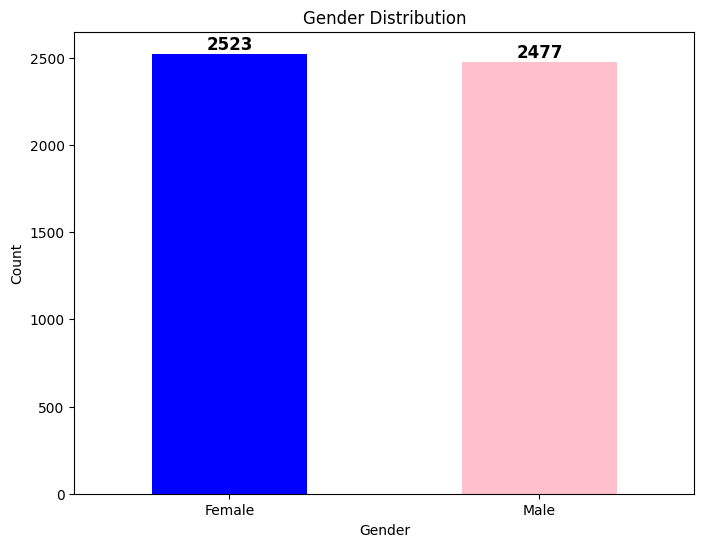

In [10]:
gender_counts = data['Gender'].value_counts()
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
for i, count in enumerate(gender_counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.xticks(rotation=0) 
plt.show()

### We can see that there not much difference only 46 boys are more than girls.

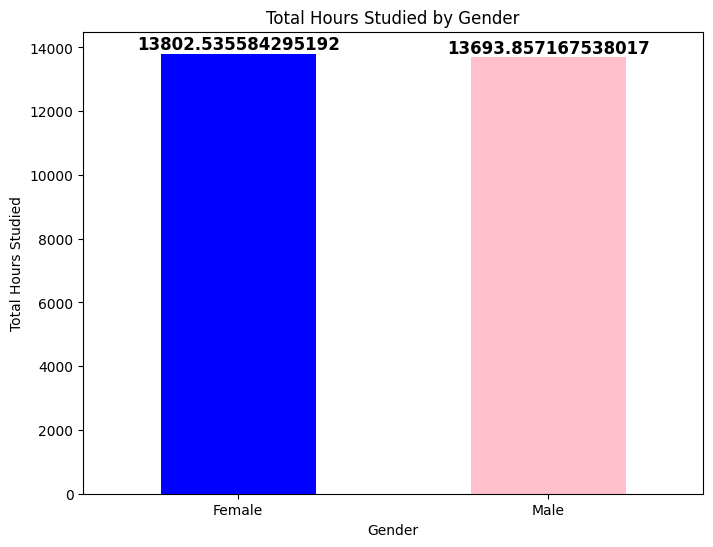

In [12]:
gender_hours = data.groupby('Gender')['Hours_Studied'].sum()
plt.figure(figsize=(8, 6))
gender_hours.plot(kind='bar', color=['blue', 'pink'])
plt.title('Total Hours Studied by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Hours Studied')
for i, count in enumerate(gender_hours):
    plt.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.xticks(rotation=0)
plt.show()

### We can see boys have a bit more total study hours than compared to girls.

In [32]:
male_mean_hourstudy = data[data['Gender'] == 'Male']['Hours_Studied'].mean()
female_mean_hourstudy = data[data['Gender'] == 'Female']['Hours_Studied'].mean()
print("Mean Study Hours for males:", male_mean_hourstudy)
print("Mean Study Hours for females:", female_mean_hourstudy)

Mean Study Hours for males: 5.528404185522009
Mean Study Hours for females: 5.470683941456675


### Average study hours for boys and girls are almost same with boys having slightly greater.

In [14]:
male_mean_iq = data[data['Gender'] == 'Male']['IQ'].mean()
female_mean_iq = data[data['Gender'] == 'Female']['IQ'].mean()
print("Mean IQ for males:", male_mean_iq)
print("Mean IQ for females:", female_mean_iq)

Mean IQ for males: 114.97416229309648
Mean IQ for females: 114.85731272294888


### Average IQ for both are almost equal.

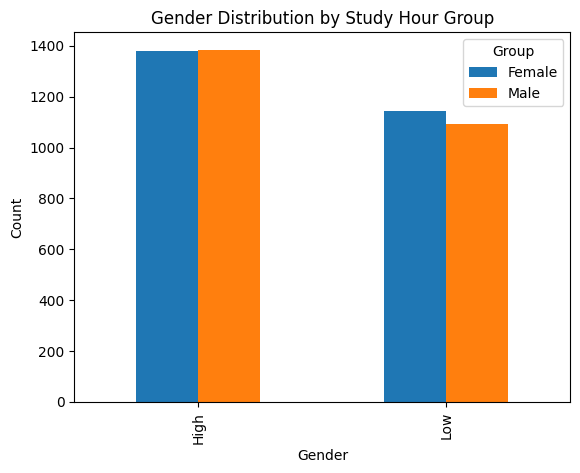

In [19]:
group_counts = data.groupby(['Study_Hours_Group', 'Gender']).size().unstack(fill_value=0)
group_counts.plot(kind='bar', stacked=False)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution by Study Hour Group')
plt.legend(title='Group', loc='upper right')
plt.show()

### We can see there are more students in high study hour grouo compared to low also we can see there are more female in low study hour group then male.

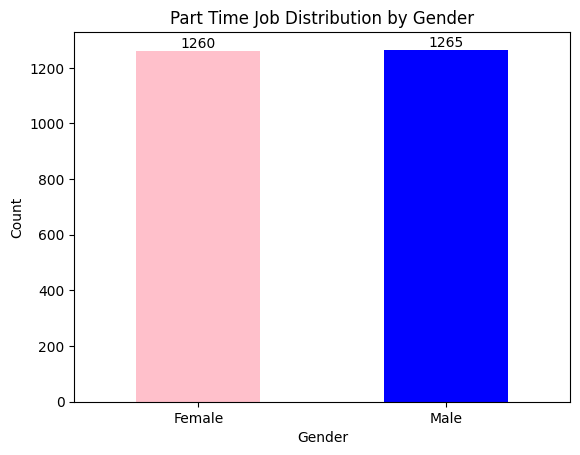

In [33]:
gender_counts = data.groupby('Gender')['Has_Part_Time_Job'].sum()
x=gender_counts.plot(kind='bar', color=['pink', 'blue'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Part Time Job Distribution by Gender')
for i, count in enumerate(gender_counts):
    x.text(i, count, str(count), ha='center', va='bottom')
plt.xticks(rotation=0)
plt.show()

### Here we can see only 5 more male have part time job then female so they have almost same number of people.

In [27]:
average_marks_by_gender = data.groupby('Gender')['Total_Marks'].mean()
print(average_marks_by_gender)

Gender
Female    209.574316
Male      210.283811
Name: Total_Marks, dtype: float64


### Average total marks of male are more than female but by very less so here also they have almost equal value.

## Summary
after analysis it feels that the values are almost same in every field for male and female but the difference is that male were intially greater by 64 so it is making difference in average values if we make equal number of male and female thnen we can get very near values and females as winners in some categories. So both are equal in terms of study and part time job.

## Made By -
Name - Gruhit Kaneriya , Roll no. - RA2211003010041